In [30]:
# Illustrating how to create one-hot encoding 

import numpy as np 

samples = ['The dog ate my homework','The cat sat on the mat']

# We create the index
# Its a dictionary
index = {}

i= 0
# We take the first sample
for sample in samples:
    # We split the sentence into words
    for word in sample.split():
        if word not in index:
            index[word] = i
            i += 1
print(index)

# We now make the vector one-hot encoded
# Maximum length of a sentence
max_len = 10

# As many lines as there are sentences 
# As many columns as there can be words per sentence (max_len)
# Depth equals the number of words in the index 
encoded = np.zeros((len(samples),max_len,max(index.values())+1))

for i in range(len(samples)):
    for j in range(max_len):
        sentence = samples[i].split()
        if j<len(sentence):
            word = sentence[j]
            encoded[i,j,index[word]] = 1
            
print(encoded)

{'The': 0, 'dog': 1, 'ate': 2, 'my': 3, 'homework': 4, 'cat': 5, 'sat': 6, 'on': 7, 'the': 8, 'mat': 9}
[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [42]:
# Character level 

import string

samples = ['The dog ate my homework','The cat sat on the mat']

characters = string.printable
# We get all the 100 printable characters
token_index = dict(zip(range(1,len(characters)+1),characters))

max_len = 50

encoded = np.zeros(shape = (len(samples),max_len,len(token_index)))

for i,sample in enumerate(samples):
    for j, char in enumerate(sample):
        index = token_index.get(char)
        encoded[i,j,index] = 1
            

In [51]:
# Using the tokenizers

import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

# To keep only the 1000 most 
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary')

print(one_hot_results)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [60]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000
max_len = 20

# We extract the imdb data set but we keep only the max_features most reccuring words
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

# We pad the sequences
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen = max_len)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=max_len)

In [63]:
# We use and embedding layer and classifier 

from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
# the first argument is the number of possible tokens, the second is the dimensionality of the embeddings 
model.add(Embedding(max_features,8,input_length=max_len))
model.add(Flatten())
# Last layer of a model made for a binary classifier 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(
    x_train, y_train,epochs = 10, batch_size = 32,validation_split = 0.2
)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6710 - accuracy: 0.6191 - val_loss: 0.6235 - val_accuracy: 0.6924
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7506 - val_loss: 0.5298 - val_accuracy: 0.7278
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4632 - accuracy: 0.7882 - val_loss: 0.5018 - val_accuracy: 0.7490
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4216 - accuracy: 0.8081 - val_loss: 0.4943 - val_accuracy: 0.7502
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3926 - accuracy: 0.8258 - val_loss: 0.4949 - val_accuracy: 0.7536
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3685 - accuracy: 0.8415 - val_loss: 0.4987 - val_accuracy: 0.7556
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3471 - accuracy: 0.8522 - val_loss: 0.5028 - val_accuracy: 0.7556
Epoch 

In [113]:
# Using pretrained embedding : Starting from raw data to embedding 

import os

base_dir ='./aclImdb'
train_dir = os.path.join(base_dir,'train')

sequences = []
targets = []

# We go through each directory
for label_type in ['neg','pos']:
    
    # We get in the directory
    text_dir = os.path.join(train_dir,label_type)
    
    for fname in os.listdir(text_dir):
        
        file = os.path.join(text_dir,fname)
        f = open(file)
        text = f.read()
        sequences.append(text)
        f.close()
        
        if label_type == 'neg':
            targets.append(0)
        else:
            targets.append(1)

In [114]:
print(len(sequences))

25000


In [115]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

maxlen = 100
max_words = 10000
validation_samples = 10000
# To illustrate the usefulness of pretrained embeddings
training_samples = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sequences)
sequences = tokenizer.texts_to_sequences(sequences)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 88582 unique tokens


In [87]:
data = pad_sequences(sequences,maxlen)

In [92]:
labels = np.asarray(targets)
print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [116]:
indices = np.arange(data.shape[0])
# To shuffle the data
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

In [99]:
glove_dir = './glove.6B'

embedding_index = {}

# We open the .txt file 
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'))
for line in f:
    # We read each line
    values = line.split()
    # We plit it into words
    # We get the first word, which is the one embedded on this line
    word = values[0]
    # Then we get its embedding
    coeffs = np.asarray(values[1:],dtype = 'float32')
    
    embedding_index[word]= coeffs
f.close()


embedding_dim = 100

# We build an empty matrix to begin with 
embedding_matrix = np.zeros((max_words, embedding_dim))
# We go through the index of the words available in our raw data
for word, i in word_index.items():
    # We get the embedding of said word by looking at the dictionary we build from the embedding matrix 
    embedding_vector = embedding_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [121]:
# We now build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [123]:
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6601 - accuracy: 0.6199 - val_loss: 0.6498 - val_accuracy: 0.5980
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5342 - accuracy: 0.7387 - val_loss: 0.6970 - val_accuracy: 0.6256
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4668 - accuracy: 0.7820 - val_loss: 0.5683 - val_accuracy: 0.7096
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.4067 - accuracy: 0.8197 - val_loss: 0.6409 - val_accuracy: 0.6885
Epoch 5/10
313/313 [==============================] - 1s 5ms/step - loss: 0.3665 - accuracy: 0.8391 - val_loss: 0.6623 - val_accuracy: 0.6927
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8572 - val_loss: 0.9080 - val_accuracy: 0.6462
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.8751 - val_loss: 0.7238 - val_accuracy: 0.6929
Epoch 

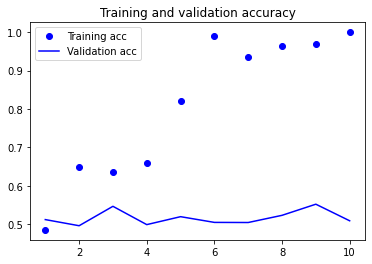

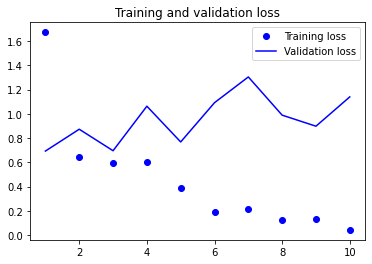

In [109]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [111]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 0s 65ms/step - loss: 0.6959 - acc: 0.5100 - val_loss: 0.6922 - val_acc: 0.5185
Epoch 2/10
7/7 [==============================] - 0s 65ms/step - loss: 0.4727 - acc: 1.0000 - val_loss: 0.7070 - 

In [1]:
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 4s 28ms/step - loss: 0.5020 - acc: 0.7622 - val_loss: 0.3282 - val_acc: 0.8704
Epoch 2/10
157/157 [==============================] - 4s 25ms/step - loss: 0.2867 - acc: 0.8885 - val_loss: 0.4435 - val_acc: 0.8068
Epoch 3/10
157/157 [==============================] - 4s 25ms/step - loss: 0.2326 - acc: 0.9122 - val_loss: 0.2815 - val_acc: 0.8878
Epoch 4/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1905 - acc: 0.9299 - val_loss: 0.3639 - val_acc: 0.8742
Epoch 5/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1739 - acc: 0.9383 - val_loss: 0.3022 - val_acc: 0.8932
Epoch 6/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1566 - acc: 0.9437 - val_loss: 0.2930 - val_acc: 0.8878
Epoch 7/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1370 - acc: 0.9515 - val_loss: 0.4291 - val_acc: 0.8638
Epoch 8/10
157/157 [==============================] - 4s 25ms/step - 

# Advanced use of reccurent neural nets
Tackling time series data using reccurent neural networks. 

More precisely, working on temperature forecasting based on several indicators. 

In [1]:
!ls

 aclImdb
 cats_and_dogs_reduced
 cats_and_dogs_small_2.h5
 cats_dogs_firstmodel.h5
'Classifying newswires.ipynb'
'CNNs on Chinese vs regular MNIST.ipynb'
'Deep Learning for Computer Vision.ipynb'
'Deep Learning for text and sequences.ipynb'
 dogs-vs-cats
 glove.6B
 jena_climate_2009_2016.csv
'Predicting House Prices.ipynb'
 pre_trained_glove_model.h5
 tests.ipynb


In [1]:
import os 

# Name of the csv file to read
fname = './jena_climate_2009_2016.csv'

# Opening the file
f = open(fname)
# Since the file is a csv there is one line so we read that line 
data = f.read()
f.close()

# Get the lines 
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(len(header))
print(len(lines))

15
420551


In [11]:
# Now we convert the lines to a numpy array

import numpy as np

array = np.zeros((len(lines),len(header)-1))

print(header)

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]] 
    array[i] = values
    
print(array.shape)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
(420551, 14)


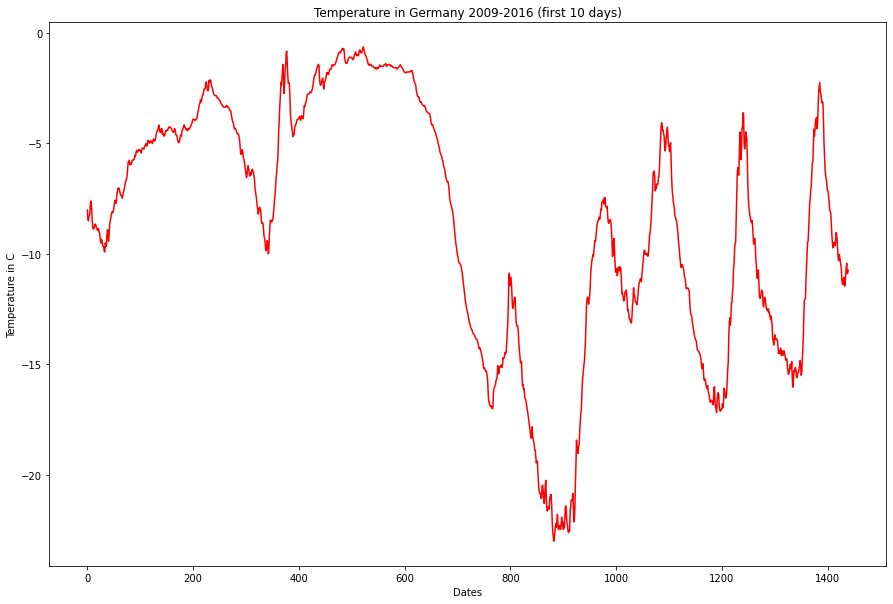

In [19]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(15,10))
plt.plot(array[:1440,1],'r')
plt.xlabel('Dates')
plt.ylabel('Temperature in C')
plt.title('Temperature in Germany 2009-2016 (first 10 days)')
plt.show()

In [46]:
# We will normalize the data 

training = array[:200000]

mean = training.mean(axis = 0)
array = array - mean

std = training.std(axis = 0)
array = array/std

In [47]:
# We define a genertor that will generate couples of sequence, target

def generator(data,lookback,delay,min_index,max_index,shuffle = False,batch_size = 128, step = 6):
    
    # If a maximum index has not been specified
    if max_index is None:
        # The maximum index is 
        max_index = array.shape[0] - delay - 1
    
    # The minium index
    i = min_index + lookback
    
    # Generate 
    while 1:
        # Shuffle the data if asked
        if shuffle: 
            rows = np.random.randint(min_index + lookback, max_index, size= batch_size)
        # Otherwise
        else:
            # If we get to the end of the array
            if i + batch_size >= max_index:
                # We get back to the beginning 
                i = min_index + lookback
            # We set a new window of values
            rows = np.arange(i,min(i+batch_size,max_index))
            # We move the index
            i += len(rows)
        
        # We initialize the samples and the targets
        samples = np.zeros((len(rows),lookback//step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        # We go through the rows 
        for j, row in enumerate(rows):
            indices = range(rows[j]-lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j]+delay][1]
        yield samples,targets
    

lookback = 1440
step = 6
delay = 144
batch_size = 128

In [48]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [51]:

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(array,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(array,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(array,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(array) - 300001 - lookback) // batch_size

def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905488


In [53]:
celsius_mae = 0.2897* std[1]
celsius_mae

2.5645689841146764

In [54]:
# After the common sense method, we use a small fully connected network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GRU

model = Sequential()
model.add(Flatten(input_shape = (lookback // step, array.shape[-1])))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

model.compile(optimizer ='rmsprop',loss='mae')
model.fit(train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 8s 16ms/step - loss: 1.2598 - val_loss: 0.7012
Epoch 2/20
500/500 [==============================] - 8s 15ms/step - loss: 0.5091 - val_loss: 0.4334
Epoch 3/20
500/500 [==============================] - 8s 15ms/step - loss: 0.3373 - val_loss: 0.3279
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2800 - val_loss: 0.3134
Epoch 5/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2637 - val_loss: 0.3139
Epoch 6/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2498 - val_loss: 0.3023
Epoch 7/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2451 - val_loss: 0.3035
Epoch 8/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2375 - val_loss: 0.3081
Epoch 9/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2314 - val_loss: 0.3263
Epoch 10/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2281 - val_lo

In [59]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(GRU(32,dropout = 0.2,input_shape = (None, array.shape[-1])))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss='mae')

model.fit(train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3241 - val_loss: 0.2776
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3040 - val_loss: 0.2705
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2959 - val_loss: 0.2707
Epoch 4/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2921 - val_loss: 0.2694
Epoch 5/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2883 - val_loss: 0.2738
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2855 - val_loss: 0.2711
Epoch 7/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2807 - val_loss: 0.2718
Epoch 8/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2786 - val_loss: 0.2707
Epoch 9/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2741 - val_loss: 0.2752
Epoch 10/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2689 - val_lo